# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np



<IPython.core.display.Javascript object>


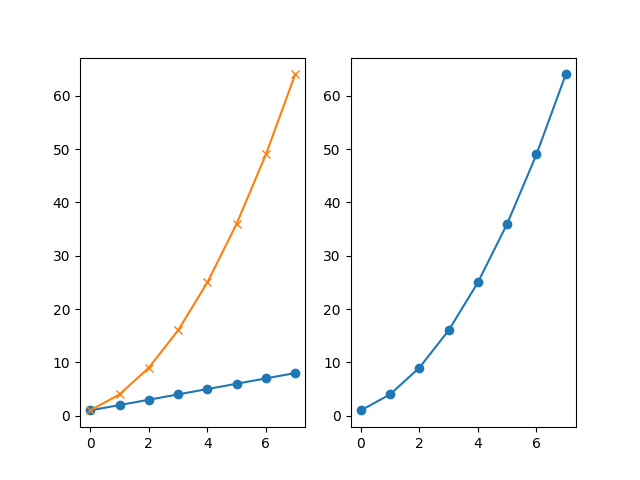

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [4]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


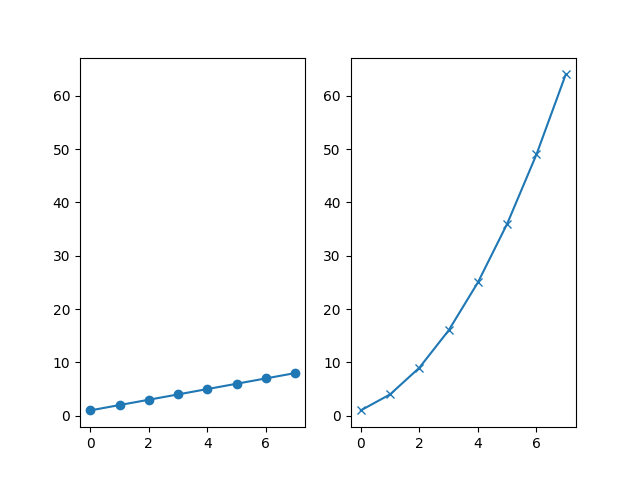

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


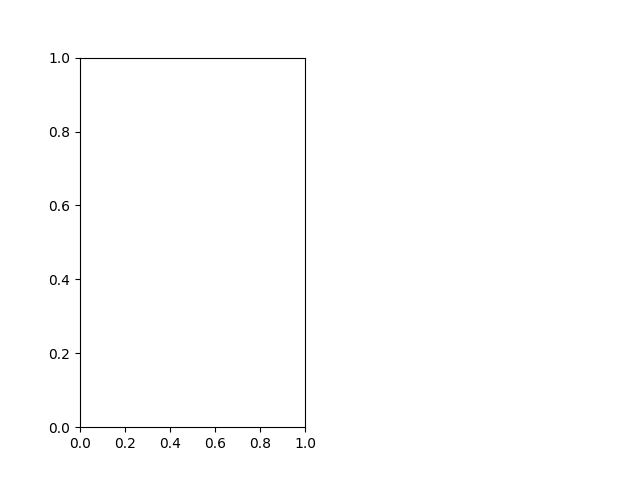

True

In [6]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


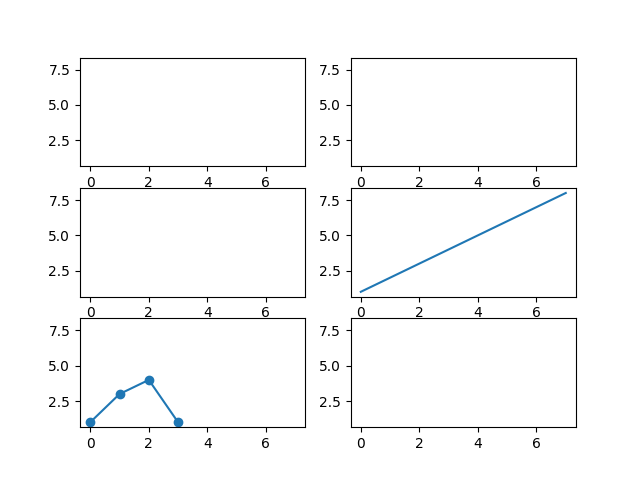

In [7]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2), (ax4,ax5), (ax7,ax8)) = plt.subplots(3,2, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [8]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for labels in ax.get_xticklabels() + ax.get_yticklabels():
        labels.set_visible(True)

In [9]:



# necessary on some systems to update the plot
ax7.plot([1,3,4,1],'-o')
plt.gcf().canvas.draw()


# Histograms

<IPython.core.display.Javascript object>


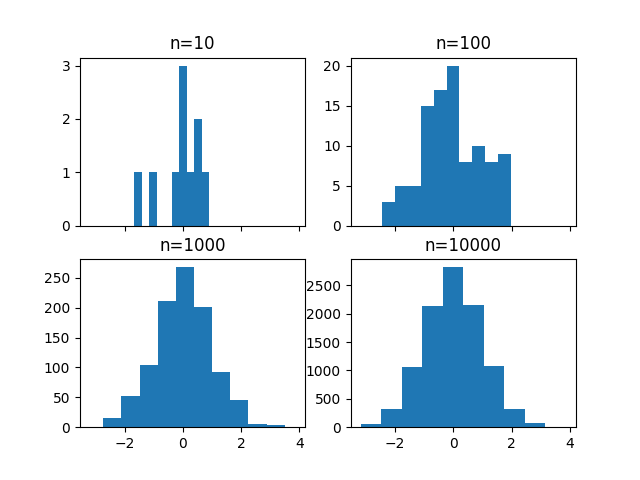

In [10]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


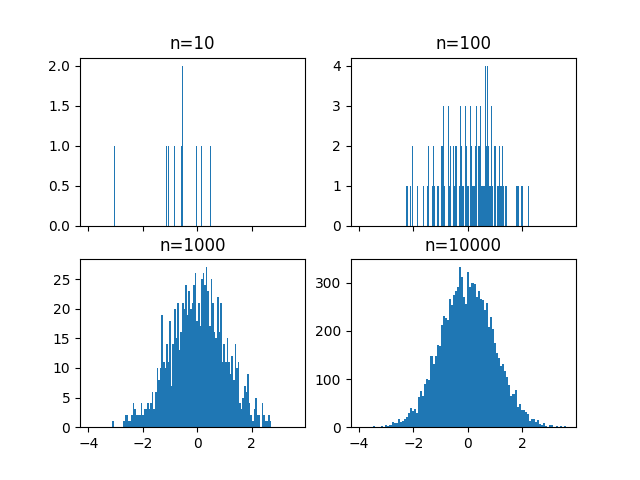

In [11]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


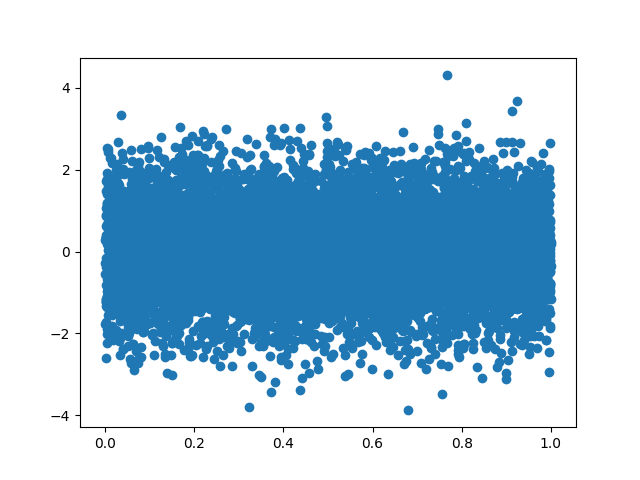

[ 0.76342252  0.23430408  0.78049532 ...,  0.63187107  0.92494954
  0.41463304]


In [12]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)
print(X)

<IPython.core.display.Javascript object>


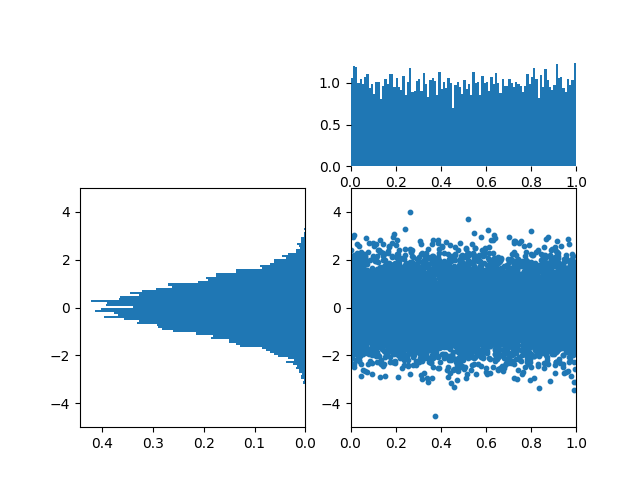

In [13]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 2)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [14]:
plt.scatter?


In [15]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.clear()
lower_right.scatter(X, Y,s=10)
top_histogram.hist(X, bins=100)
s=side_histogram.hist(Y, bins=100, orientation='horizontal')

In [16]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [17]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

In [18]:
for i in top_histogram.spines.values():
   i.set_visible(False)

    

![MOOC DATA](moocdata.png "Image")

# Box and Whisker Plots

In [19]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [20]:
plt.boxplot?

In [21]:
df.describe().loc["mean"]

gamma     1.992474
normal   -0.013875
random    0.501099
Name: mean, dtype: float64

<IPython.core.display.Javascript object>


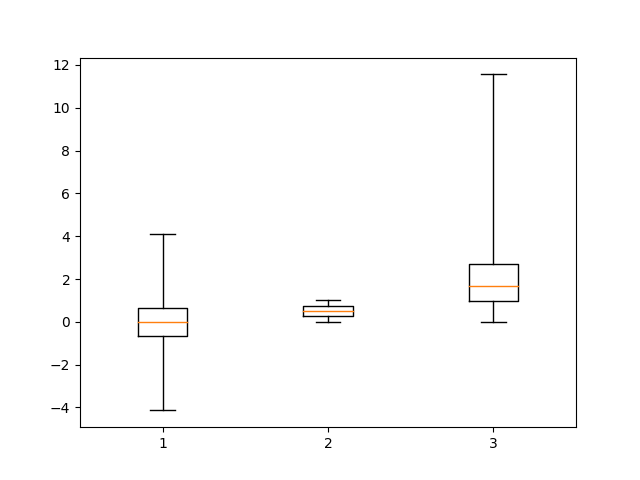

In [22]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['gamma'], whis='range')



In [23]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')# whis determines reach of whisker beyond second and third quartile

<IPython.core.display.Javascript object>


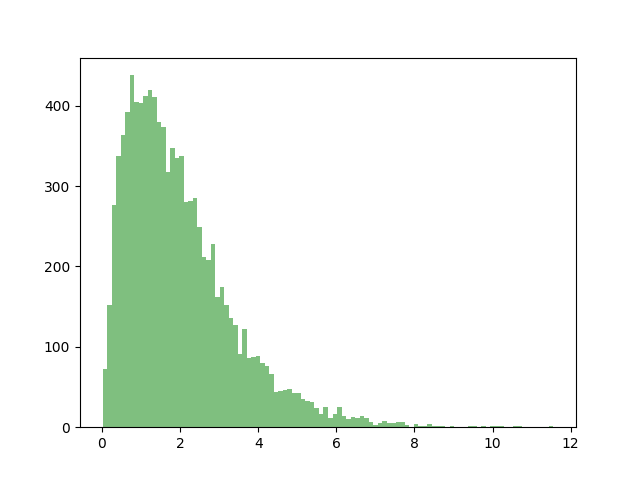

In [24]:
plt.figure()
_ = plt.hist(df['gamma'], color="g",bins=100,alpha=0.5)

<IPython.core.display.Javascript object>


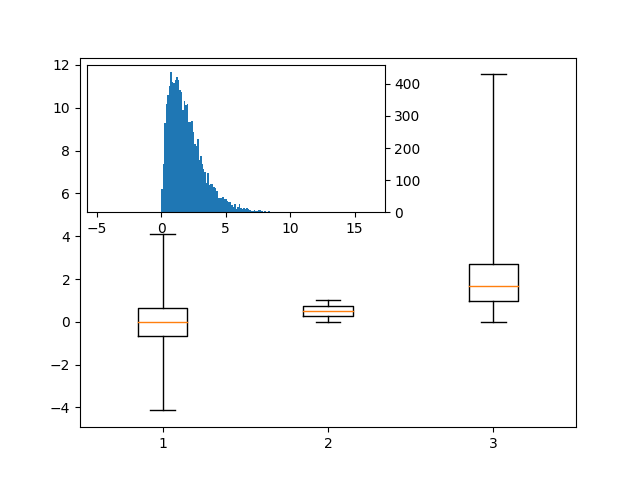

In [25]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [26]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


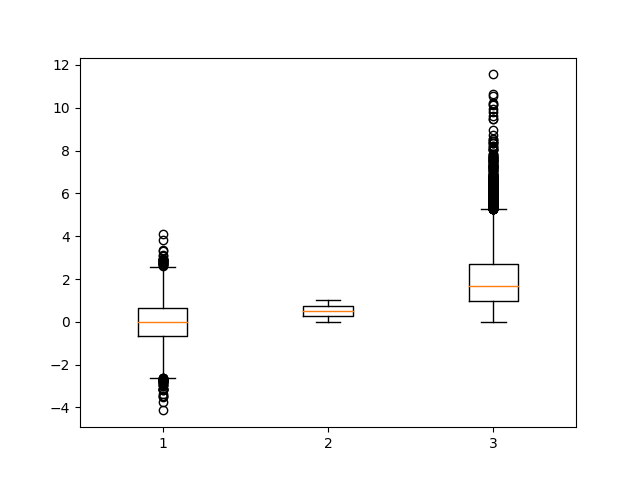

In [27]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


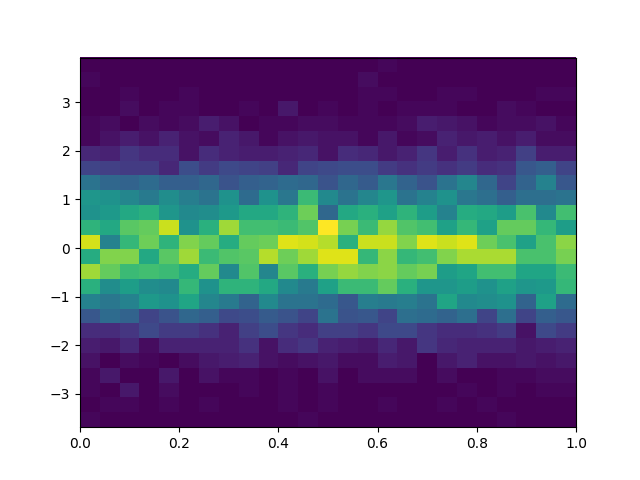

In [28]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


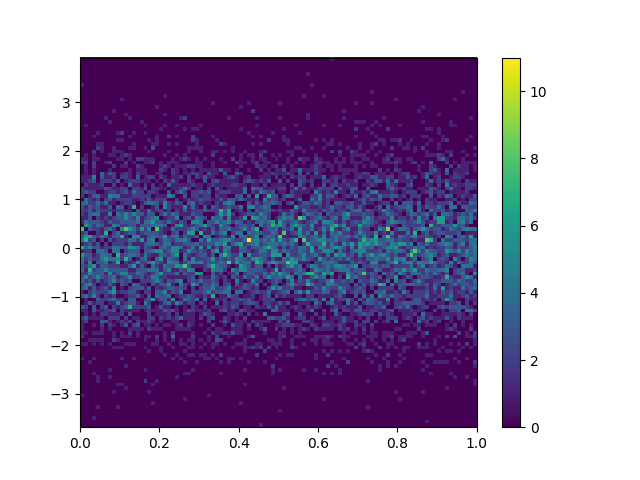

In [29]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [30]:
# add a colorbar legend
plt.colorbar()

# Animations

In [31]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)#returns samples from standard normal distribution
x


array([ 0.6652688 , -0.24985961, -0.00490673, -2.11657338,  1.72691083,
       -0.06693038, -0.94357229, -0.3683597 , -1.56090543, -1.02316246,
        0.39208306,  0.59816684, -0.4510245 ,  0.44486095,  0.21474555,
        0.07663382,  0.10232903,  1.40767985, -1.43218022,  0.04641464,
       -1.22932474,  0.29556503,  1.74324128,  1.52467227, -0.57405063,
       -1.1307257 , -1.27354444,  1.18419933, -1.33770191,  1.21096384,
       -0.49423579,  0.12294515, -0.55692859, -0.44923393, -0.33413655,
        0.67304467,  0.60678652, -0.00365212,  1.52673093,  0.72551444,
        1.7907362 , -0.42452176, -0.00999547,  1.41316628, -1.89836386,
        1.74848738, -1.66273657,  1.59636249, -0.93388636,  0.52817569,
       -0.08222541,  1.18152785,  2.05479459, -0.49787413, -2.75996169,
       -0.39690979, -0.89364647,  0.19292451, -0.33128632,  0.01462355,
        0.35392382, -0.61590412, -1.13529526,  0.63950289, -1.71903067,
       -1.57309567,  0.59503524, -0.61092907,  0.22804984, -0.18

In [32]:
plt.annotate?

In [33]:
# create the function that will do the plotting, where curr is the current frame


def update(curr):
    #argument is the current frame
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()#clear current axes
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,25])


<IPython.core.display.Javascript object>


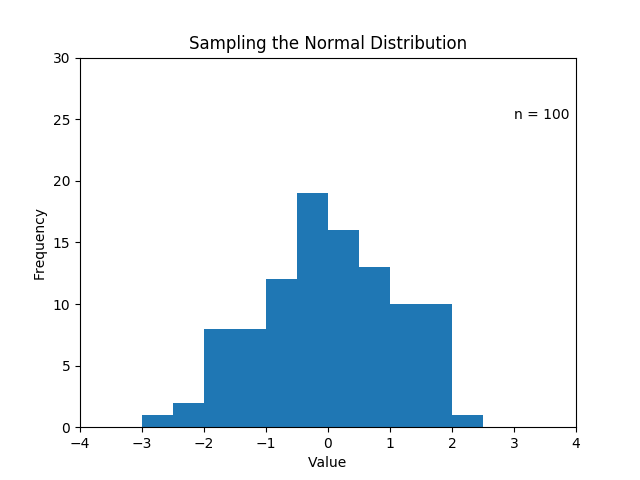

In [39]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update,interval=100, blit=True)#interval is in milliseconds

# Interactivity

<IPython.core.display.Javascript object>


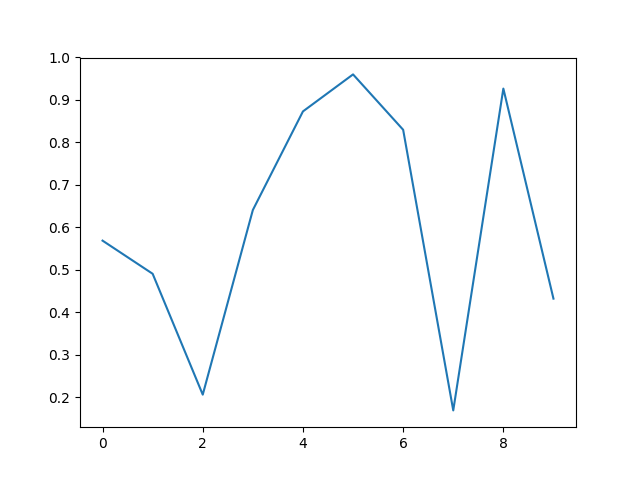

7

In [35]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def oclick(event):
    plt.cla() 
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{},{}'.format(event.x, event.y, event.xdata, event.ydata, event.inaxes))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', oclick)

In [36]:
import pandas as pd


origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

np.random.shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.252513,Germany,0.054894
1,0.782471,Iraq,0.865450
2,0.500266,UK,0.031400
3,0.970870,Canada,0.056375
4,0.447886,India,0.635602
5,0.803016,Mexico,0.913054
6,0.683834,China,0.591758
7,0.109742,Brazil,0.910346
8,0.537856,Chile,0.097174
9,0.783821,USA,0.588560


<IPython.core.display.Javascript object>


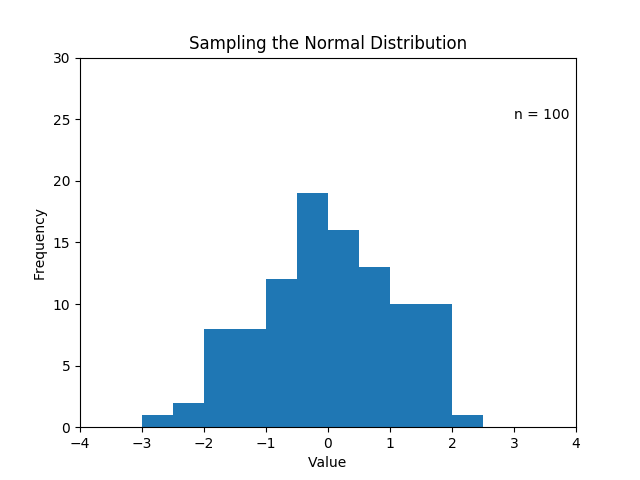

In [37]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [38]:
def onpick(event):
    
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {} \n {}'.format(origin,event.artist.get_ydata()))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7